In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys 
import numpy as np
sys.path.append('/home/alexabades/recsys')

In [3]:
datapath = "~/recsys/data/raw/frappe/"
df = pd.read_csv(datapath + "frappe.csv", sep="\t")
meta_app = pd.read_csv(datapath +'meta.csv', sep="\t")
df_meta = df.merge(meta_app, on='item')

In [4]:
df_meta.head(1)

,user,item,cnt,daytime,weekday,isweekend,homework,cost,weather,country,...,category,downloads,developer,icon,language,description,name,price,rating,short desc
0,0,0,1,morning,sunday,weekend,unknown,free,sunny,United States,...,Productivity,"1,000,000 - 5,000,000",Any.DO,http://d2lh3rxs7crswz.cloudfront.net/com.anydo...,en,"Meet Any.DO, the best way to-do To-do's on And...",Any.DO To-do & Tasks List,Free,4.5,Any.DO helps you remember everything you have ...


- user: Nominal, unique identifier
- item: Nominal, unique identifier
- cnt: Ratio: number of times the app has been used by user
- daytime: Nominal, time of app usage
- weekday: Nominal, day of the week
- isweekend: Nominal, weekend or a workday
- homework: Nominal, user's location
- cost: Nominal, free or paid
- weather: Nomianal, weather conditions at the time of app usage
- country: Nominal, user's country
- city: Nominal, user's city identifier
- package: Nominal, unique identifier Android application
- category: Nominal, genre or category by application
- downloads: Ordinal, number of download ranges
- developer: Nominal, the developer or publisher
- icon: Textual data, associated URL icon
- language: Nominal, , ISO 639-1 standard language codes
- description: Textual data, detailed description of the app
- name: Textual, name of the application
- price: Nominal/Ratio, price of the application
- rating: Ratio, ratings on a scale from 1-5
- short desc: Textual data, shorter description of the app

If we include cost which is nominal we can set Price to ratio, transofrimng to numerical all categories.

In [44]:
for i in df.columns:
  print(f"{i.capitalize()} has {len(df[i].unique())} values, sample values: \n {df[i].unique()[:5] if len(df[i].unique()) < 50  else df[i].unique()[:3] }")

User has 957 values, sample values: 
 [0 1 2]
Item has 4082 values, sample values: 
 [0 1 2]
Cnt has 1981 values, sample values: 
 [1 7 6]
Daytime has 7 values, sample values: 
 ['morning' 'afternoon' 'evening' 'sunset' 'night']
Weekday has 7 values, sample values: 
 ['sunday' 'saturday' 'monday' 'thursday' 'wednesday']
Isweekend has 2 values, sample values: 
 ['weekend' 'workday']
Homework has 3 values, sample values: 
 ['unknown' 'home' 'work']
Cost has 2 values, sample values: 
 ['free' 'paid']
Weather has 9 values, sample values: 
 ['sunny' 'cloudy' 'unknown' 'foggy' 'rainy']
Country has 80 values, sample values: 
 ['United States' 'Spain' 'Switzerland']
City has 233 values, sample values: 
 [   0  369 1028]


In [39]:
for i in meta_app.columns:
  print(f"{i.capitalize()} has {len(meta_app[i].unique())} values, sample values: \n {meta_app[i].unique()[:5] if len(meta_app[i].unique()) < 50  else meta_app[i].unique()[:1] } \n")

Item has 4082 values, sample values: 
 [0] 

Package has 3533 values, sample values: 
 ['com.anydo'] 

Category has 32 values, sample values: 
 ['Productivity' 'News & Magazines' 'Tools' 'Social' 'Shopping'] 

Downloads has 16 values, sample values: 
 ['1,000,000 - 5,000,000' '50,000,000 - 100,000,000' '10,000 - 50,000'
 '100,000,000 - 500,000,000' 'unknown'] 

Developer has 2809 values, sample values: 
 ['Any.DO'] 

Icon has 3533 values, sample values: 
 ['http://d2lh3rxs7crswz.cloudfront.net/com.anydo.png'] 

Language has 29 values, sample values: 
 ['en' 'unknown' 'he' 'zh' 'es'] 

Description has 3520 values, sample values: 
 ["Meet Any.DO, the best way to-do To-do's on Android. It's simple, beautiful & fun Millions use Any.DO every day to remember all the tasks they want to-do and make sure they get them done. Key benefits: Seamless cloud sync, Speech recognition, Alerts, Snooze tasks, Google Task Sync, Notes, Sub tasks, Amazing Widgets, Repeating / Recurring Tasks, Missed call, A

#### We used 22 contextual features derived by four contextual dimensions, including time of the day, day of the week, location, and weather
- time of the day: **daytime**: 7 contextual Features
- day of the week: **weekday** or **isweekend**
- day of the week: **city** or **country**
- weather: **weather**

In [60]:
contextual = ["daytime", "weekday", "weather", "isweekend", "homework", "city", "country"]
for i in contextual:
  print(f"{i.capitalize()} has {len(df[i].unique())} values \n {df[i].unique() if len(df[i].unique())<50 else df[i].unique()[:20]}")

Daytime has 7 values 
 ['morning' 'afternoon' 'evening' 'sunset' 'night' 'noon' 'sunrise']
Weekday has 7 values 
 ['sunday' 'saturday' 'monday' 'thursday' 'wednesday' 'tuesday' 'friday']
Weather has 9 values 
 ['sunny' 'cloudy' 'unknown' 'foggy' 'rainy' 'stormy' 'drizzle' 'snowy'
 'sleet']
Isweekend has 2 values 
 ['weekend' 'workday']
Homework has 3 values 
 ['unknown' 'home' 'work']
City has 233 values 
 [   0  369 1028  147  514  373  799  133  136 1007  401  356  128 1000
 1031  374  661  378  390  331]
Country has 80 values 
 ['United States' 'Spain' 'Switzerland' 'India' 'Canada' 'unknown'
 'United Kingdom' 'Greece' 'Peru' 'Lithuania' 'Poland' 'Israel' 'Belgium'
 'Slovenia' 'Palestine' 'Ecuador' 'Mexico' 'Netherlands' 'Australia'
 'Germany']


In [58]:
contextual = ["daytime", "weekday", "weather"]
num_context = 0 
for i in contextual:
  num_context += len(df[i].unique())

print(f"The number of contextual Features driven by daytime, weekday and weather is {num_context}")

The number of contextual Features driven by daytime, weekday and weather is 23


##### For the location we have 3 posibilities: City, country and homework. 
- City identifiers are nominal data, meaning they represent categories without any intrinsic order or distance metric between them. Therefore, we cannot treat this as ordinal or interval data. In order to use this to train the model 

In [79]:
contextual = ["daytime",  "weather", "isweekend", "homework"]
num_context = 0 
for i in contextual:
  print(len(df[i].unique()))

7
9
2
3


In [76]:
contextual = ["daytime",  "weather", "isweekend", "homework"]
num_context = 0 
for i in contextual:
  num_context += len(df[i].unique())

print(f"The number of contextual Features driven by daytime, weather, isweekend and homework is {num_context}")

The number of contextual Features driven by daytime, weather, isweekend and homework is 21


#### We can add the cnt feature as the goal is the rating and achieve the 22 features, additionally they say: 
- To estimate the usage frequencies of each user, we employ a log transformation on the raw frequency numbers represents the application usage rating scale of 0 to 4.46
#### Therefore, cnt feature is indeed used in the model

In [78]:
ratings = []
unkowns = 0
for i in df_meta.rating.unique():
  if i != 'unknown':
    ratings.append(float(i))
  else: unkowns += 1
  pass
print(f"Number of unkowns: {unkowns}")

Number of unkowns: 1


In [6]:

df = df_meta[['user', 'item', 'rating', 'cnt', "daytime",  "weather", "isweekend", "homework" ]]

In [7]:
df.head(1)

,user,item,rating,cnt,daytime,weather,isweekend,homework
0,0,0,4.5,1,morning,sunny,weekend,unknown


In [9]:
contextual = ["daytime",  "weather", "isweekend", "homework"]
df_bin = pd.get_dummies(df, columns=contextual, dtype=int)
df_bin.head(1)

,user,item,rating,cnt,daytime_afternoon,daytime_evening,daytime_morning,daytime_night,daytime_noon,daytime_sunrise,...,weather_sleet,weather_snowy,weather_stormy,weather_sunny,weather_unknown,isweekend_weekend,isweekend_workday,homework_home,homework_unknown,homework_work
0,0,0,4.5,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0


In [10]:
for i in contextual:
  print(df[i].unique())

['morning' 'afternoon' 'evening' 'sunset' 'night' 'noon' 'sunrise']
['sunny' 'cloudy' 'unknown' 'foggy' 'rainy' 'stormy' 'drizzle' 'snowy'
 'sleet']
['weekend' 'workday']
['unknown' 'home' 'work']


In [39]:
user_interactions_sorted = df.groupby("item")["cnt"].count().sort_values(ascending=False)

In [40]:
user_interactions_sorted.mean(), user_interactions_sorted.median()

(23.56761391474767, 3.0)

In [44]:
sum(user_interactions_sorted <= 3) 

2360

In [29]:
# average interaction 


(100.52560083594567, 21.0)

## Distribution Plots

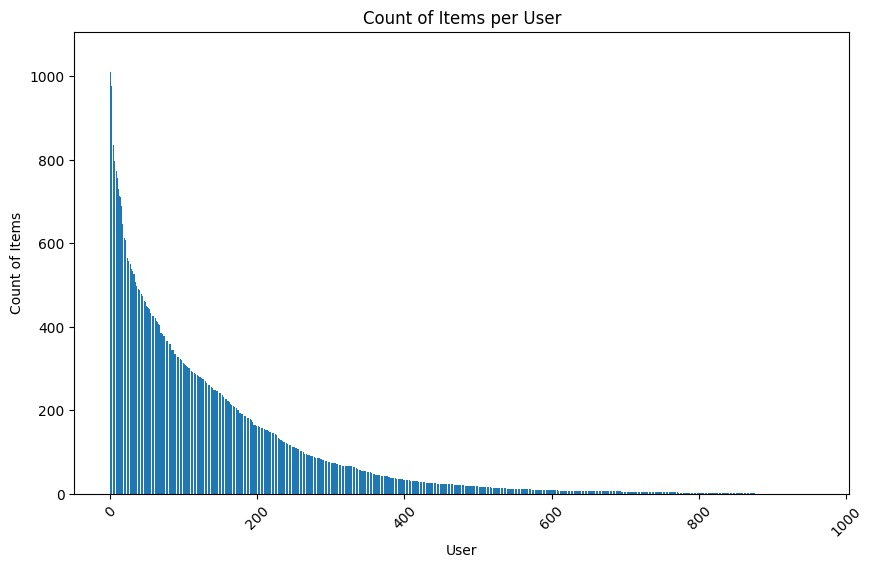

In [3]:
user_interactions_sorted = df.groupby("user")["cnt"].count().sort_values(ascending=False)
sorted_counts_df = user_interactions_sorted.reset_index()
sorted_counts_df.columns = ['User', 'Count of Items'] 
# sorted_counts_df.to_csv("user_interactions_count.csv")


plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_counts_df)), sorted_counts_df['Count of Items'])
plt.xlabel('User')
plt.ylabel('Count of Items')
plt.title('Count of Items per User')
plt.xticks(rotation=45)  # Rotate for better label readability
plt.show()

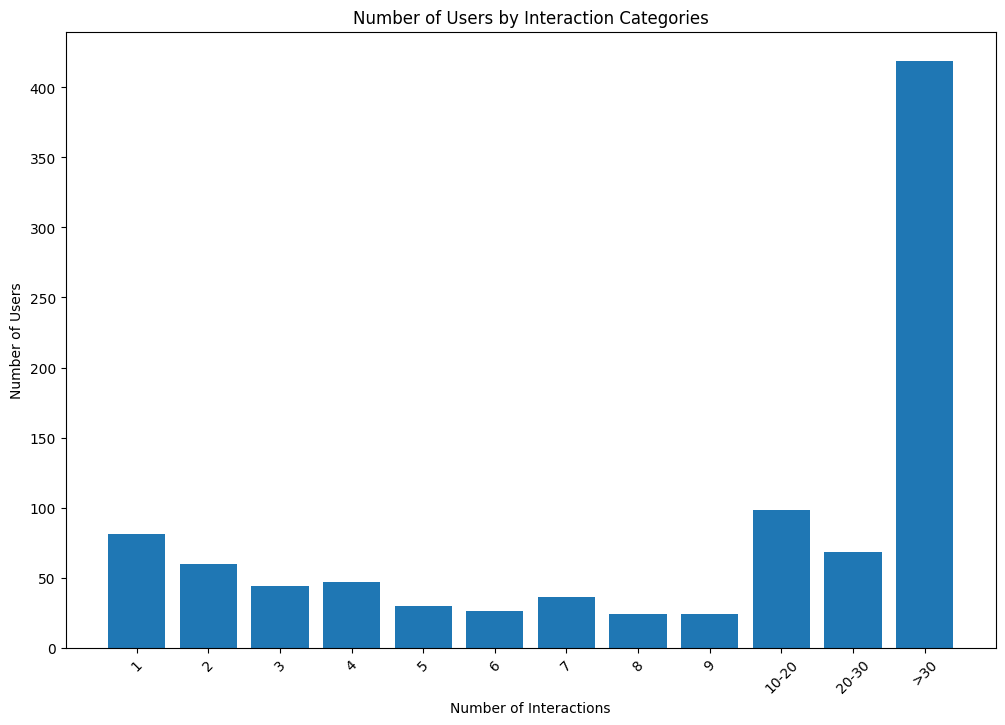

In [4]:
# Step 1: Calculate interaction counts per user
interaction_counts = df.groupby('user')['cnt'].size()

# Step 2: Define the bins and labels for the categories
bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, np.inf]
labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10-20', '20-30', '>30']

# Step 3: Bin the data into the specified categories
interaction_categories = pd.cut(interaction_counts, bins=bins, labels=labels, right=False)

# Step 4: Count the number of users in each category
category_counts = interaction_categories.value_counts().sort_index()

# Step 5: Plot
plt.figure(figsize=(12, 8))
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Number of Interactions')
plt.ylabel('Number of Users')
plt.title('Number of Users by Interaction Categories')
plt.xticks(rotation=45)  # Improve readability of x-axis labels

plt.show()

# category_counts.to_csv("frequency_intercation.csv")

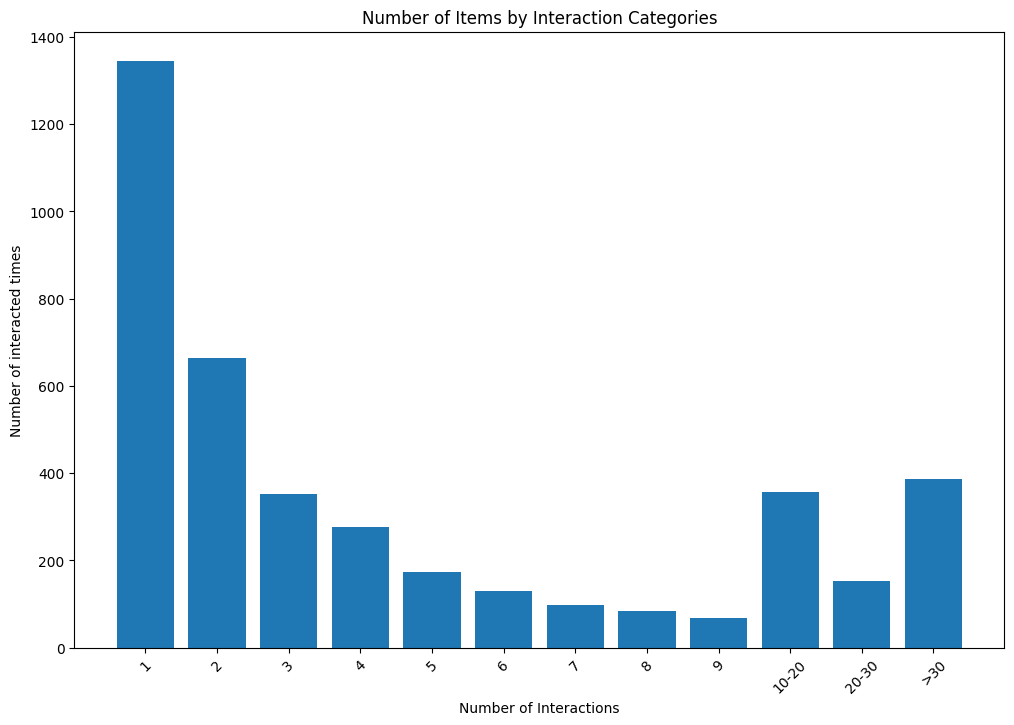

In [45]:
# Step 1: Calculate interaction counts per user
interaction_counts_items = df.groupby('item')['cnt'].size()

# Step 2: Define the bins and labels for the categories
bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, np.inf]
labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10-20', '20-30', '>30']

# Step 3: Bin the data into the specified categories
interaction_categories = pd.cut(interaction_counts_items, bins=bins, labels=labels, right=False)

# Step 4: Count the number of users in each category
category_counts = interaction_categories.value_counts().sort_index()

# Step 5: Plot
plt.figure(figsize=(12, 8))
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Number of Interactions')
plt.ylabel('Number of interacted times')
plt.title('Number of Items by Interaction Categories')
plt.xticks(rotation=45)  # Improve readability of x-axis labels

plt.show()

category_counts.to_csv("frequency_intercation.csv")

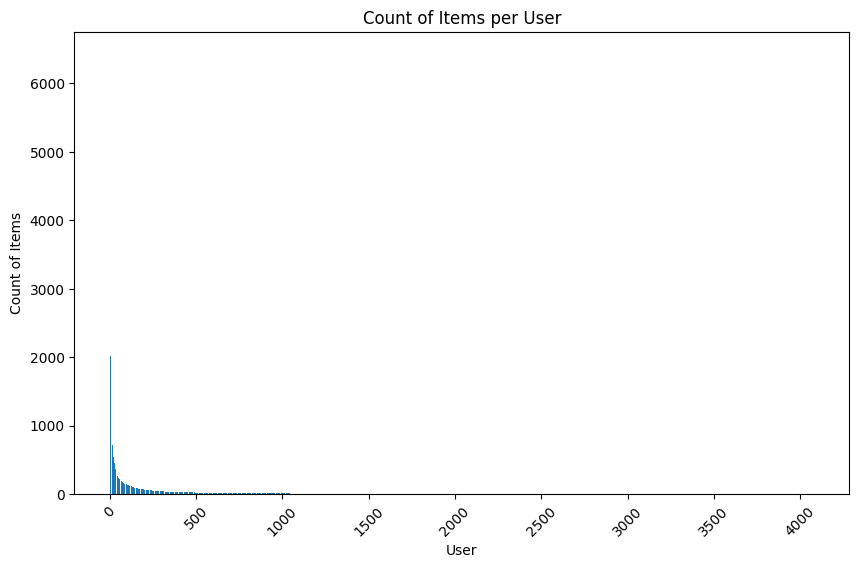

In [5]:
item_interactions_sorted = df.groupby("item")["cnt"].count().sort_values(ascending=False)
sorted_counts_df = item_interactions_sorted.reset_index()
sorted_counts_df.columns = ['Item', 'Count of users'] 
# sorted_counts_df.to_csv("item_interactions_count.csv")


plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_counts_df)), sorted_counts_df['Count of users'])
plt.xlabel('User')
plt.ylabel('Count of Items')
plt.title('Count of Items per User')
plt.xticks(rotation=45)  # Rotate for better label readability
plt.show()